In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

Using TensorFlow backend.


In [2]:
#讓圖片位於0~1之間
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
#one_hot
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [3]:
#壓平
x_img_train_normalize = x_img_train_normalize.reshape(-1, 3072)
x_img_test_normalize = x_img_test_normalize.reshape(-1, 3072)
x_train = x_img_train_normalize
x_test = x_img_test_normalize
t_train = y_label_train_OneHot
t_test = y_label_test_OneHot

In [5]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

from three_layer_net import ThreeLayerNet

network = ThreeLayerNet(input_size=3072, hidden_size=500, output_size=10)
iters_num = 10000  
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2','W3','b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if(i % iter_per_epoch == 0):
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.1, 0.1
train acc, test acc | 0.10564, 0.1049
train acc, test acc | 0.18218, 0.1867
train acc, test acc | 0.24128, 0.2377
train acc, test acc | 0.24968, 0.2531
train acc, test acc | 0.30544, 0.3009
train acc, test acc | 0.31108, 0.3079
train acc, test acc | 0.2961, 0.2954
train acc, test acc | 0.33138, 0.3301
train acc, test acc | 0.36064, 0.3602
train acc, test acc | 0.36214, 0.3591
train acc, test acc | 0.3735, 0.3757
train acc, test acc | 0.39, 0.3846
train acc, test acc | 0.3825, 0.3803
train acc, test acc | 0.38618, 0.3895
train acc, test acc | 0.41704, 0.4186
train acc, test acc | 0.44198, 0.4342
train acc, test acc | 0.4259, 0.419
train acc, test acc | 0.42614, 0.4222
train acc, test acc | 0.44548, 0.4312


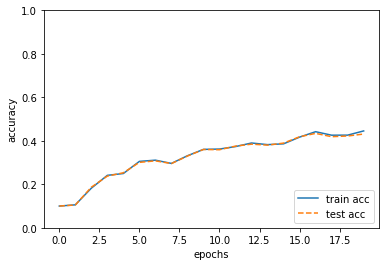

In [6]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()